In [1]:
import latools as la

import demo_helpers as demo

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Import

In [2]:
data = la.analyse('latools/resources/test_data/',)

Loading Data: 100%|██████████| 5/5 [00:00<00:00, 103.92it/s]

Starting analysis using "UCD-AGILENT" configuration:
  5 Data Files Loaded: 2 standards, 3 samples
  Analytes: Mg24 Mg25 Al27 Ca43 Ca44 Mn55 Sr88 Ba137 Ba138
  Internal Standard: Ca43


## Despiking

In [3]:
# f = demo.despike_demo()

In [4]:
# cycle despiking until nothing is removed?

In [5]:
data.despike(exponentplot=False)

Despiking: 100%|██████████| 5/5 [00:00<00:00, 778.42it/s]


## Data ID

<img src="./autorange.png">

In [6]:
data.autorange()

AutoRange: 100%|██████████| 5/5 [00:00<00:00, 10.48it/s]


In [7]:
data.trace_plots(ranges=True)

Drawing Plots: 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]


## Background Correction

In [8]:
# model as exponential increase/decrease reflecting cone saturation/washout?

# background variability flag?
# consider signal/background in flag.

In [9]:
data.bkg_calc_weightedmean()

Plotting backgrounds: 100%|██████████| 1/1 [00:00<00:00, 11.66it/s]


(<Figure size 540x360 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7ff8d80e7da0>)

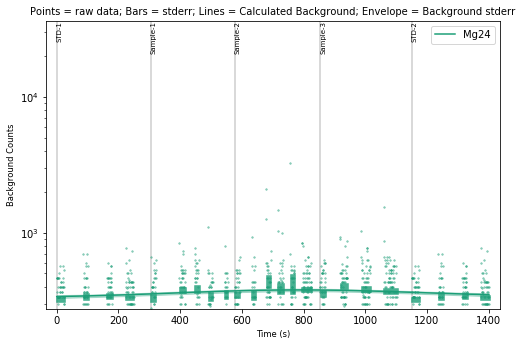

In [10]:
data.bkg_plot('Mg24')

In [11]:
data.bkg_subtract()

Background Subtraction: 100%|██████████| 5/5 [00:00<00:00,  8.74it/s]


## Ratio

In [12]:
data.trace_plots()

Drawing Plots: 100%|██████████| 5/5 [00:01<00:00,  3.61it/s]


In [13]:
data.ratio()

Ratio Calculation: 100%|██████████| 5/5 [00:00<00:00, 23.63it/s]


## Calibration

In [14]:
data.calibrate(srms_used=['NIST610', 'NIST612', 'NIST614'])

Applying Calibrations: 100%|██████████| 5/5 [00:00<00:00,  7.38it/s]


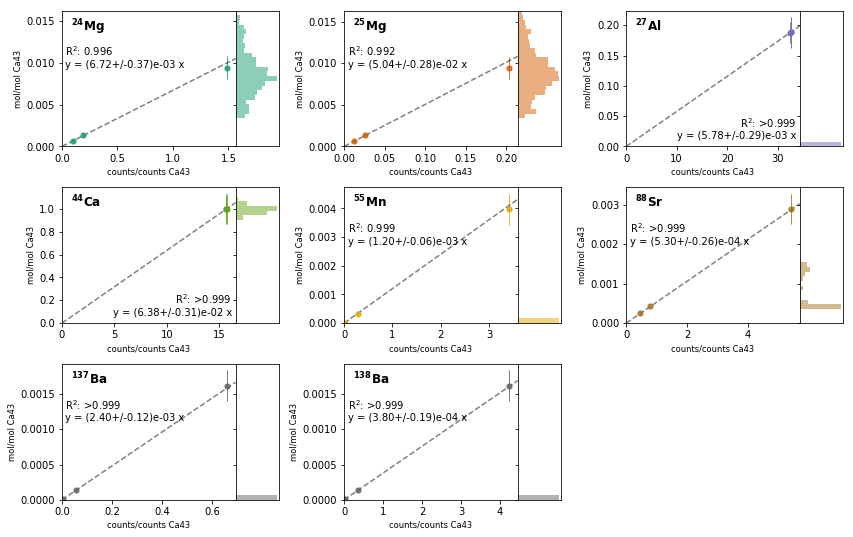

In [15]:
fig, axs = data.calibration_plot()

## Data Selection ('filtering')

Drawing Plots: 100%|██████████| 28/28 [00:00<00:00, 271.32it/s]


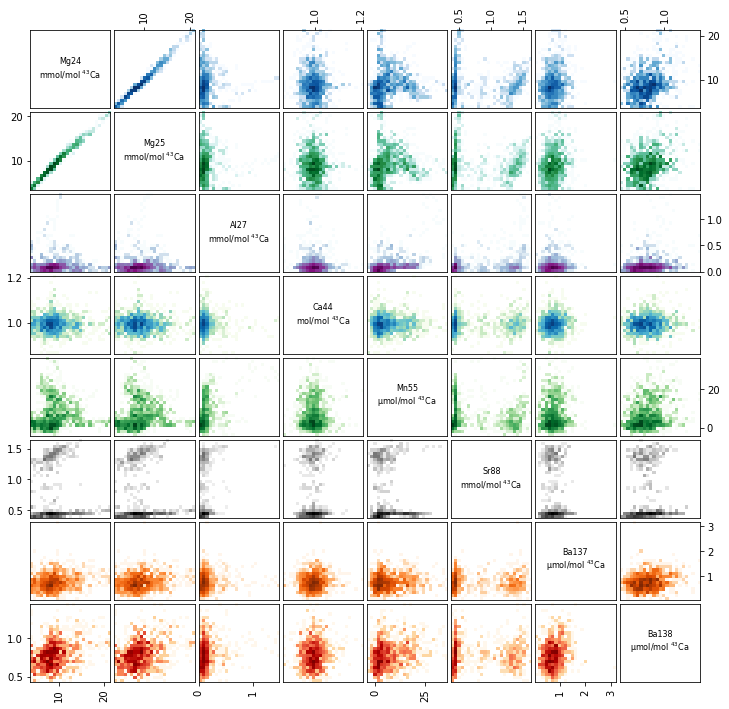

In [16]:
f, a = data.crossplot()

In [44]:
data.filter_clear()

In [18]:
data.filter_threshold('Sr88', 0.6e-3)

Threshold Filter: 100%|██████████| 3/3 [00:00<00:00, 1387.62it/s]


In [45]:
data.filter_clustering(['Sr88'], method='DBSCAN')

Clustering Filter:   0%|          | 0/3 [00:00<?, ?it/s]


TypeError: '>=' not supported between instances of 'int' and 'NoneType'

In [42]:
data.filter_status()

Subset: All Samples

n  Filter Name                 Mg24   Mg25   Al27   Ca43   Ca44   Mn55   Sr88   Ba137  Ba138  
0  Sr88_cluster-kmeans_0       False  False  False  False  False  False  False  False  False  
1  Sr88_cluster-kmeans_1       False  False  False  False  False  False  False  False  False  
2  Sr88_cluster-kmeans_0       False  False  False  False  False  False  False  False  False  
3  Sr88_cluster-kmeans_1       False  False  False  False  False  False  False  False  False  
4  Sr88_cluster-meanshift_0    True   True   True   True   True   True   True   True   True   
5  Sr88_cluster-meanshift_1    False  False  False  False  False  False  False  False  False  
6  Sr88_cluster-meanshift_2    False  False  False  False  False  False  False  False  False  



In [40]:
data.filter_off()

In [41]:
data.filter_on('Sr88_meanshift_0')

Drawing Plots: 100%|██████████| 28/28 [00:00<00:00, 146.77it/s]


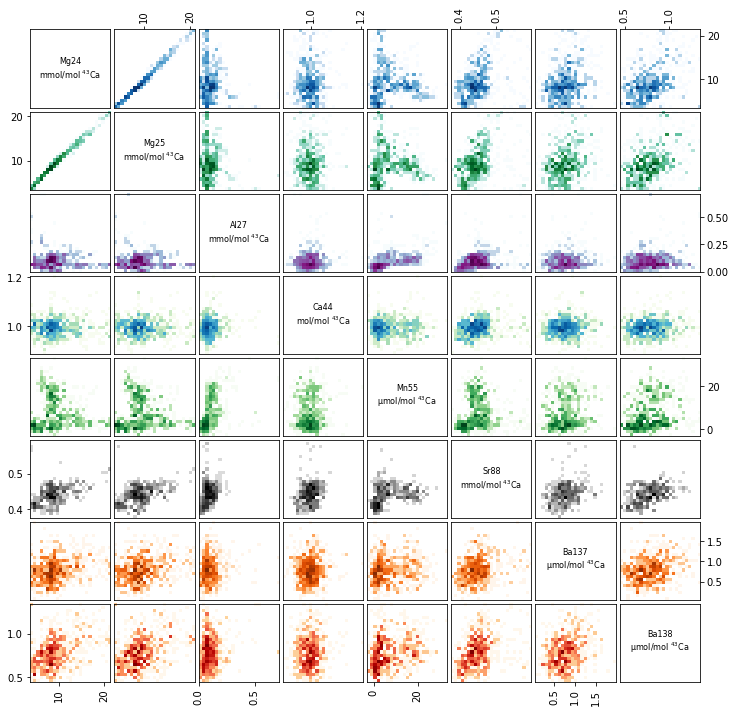

In [43]:
f, a = data.crossplot(filt=True)

In [29]:
data.trace_plots(filt=True)

Drawing Plots: 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]


In [19]:
data.filter_reports('Al27', filt_str='Al27_thresh_below')

Drawing Plots: 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]


In [31]:
data.filter_clustering(['Al27', 'Mn55'], filt=True, method='meanshift', sort='Mn55')

Clustering Filter: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]


In [33]:
data.filter_reports('Al27', filt_str='clust')

Drawing Plots: 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]


In [34]:
data.filter_status()

Subset: All Samples

n  Filter Name                      Mg24   Mg25   Al27   Ca43   Ca44   Mn55   Sr88   Ba137  Ba138  
0  Sr88_thresh_below                True   True   True   True   True   True   True   True   True   
1  Sr88_thresh_above                False  False  False  False  False  False  False  False  False  
2  Al27-Mn55_cluster-meanshift_0    False  False  False  False  False  False  False  False  False  
3  Al27-Mn55_cluster-meanshift_1    False  False  False  False  False  False  False  False  False  
4  Al27-Mn55_cluster-meanshift_2    False  False  False  False  False  False  False  False  False  
5  Al27-Mn55_cluster-meanshift_3    False  False  False  False  False  False  False  False  False  

